In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

### Erosion

uint8
(486, 486)


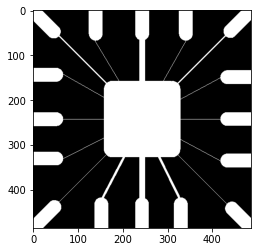

In [41]:
img= cv.imread('/content/Fig0905(a)(wirebond-mask).tif', 0)

print(img.dtype)
print(img.shape)
plt.imshow(img, cmap = 'gray', vmin= 0,vmax=256)

In [42]:
m,n= img.shape


In [43]:
k= 11

SE= np.ones((k,k)) 
const= (k-1)//2

eroded_img= np.zeros((m,n))

Text(0.5, 1.0, 'Eroded with SE of size 11')

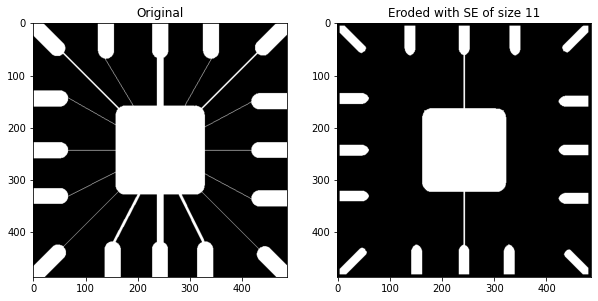

In [44]:
for i in range(const, m-const):
  for j in range(const, n-const):
    temp= img[(i-const):(i+const+1), (j-const):(j+const+1)]
    product= temp*SE
    eroded_img[i,j]= np.min(product)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(eroded_img, cmap="gray")
plt.title("Eroded with SE of size 11")

### Dialation

#### Dialation with square matrix

uint8
(444, 508)


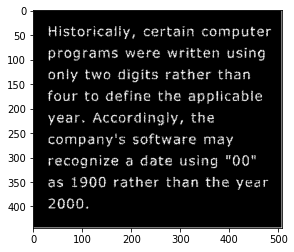

In [137]:
img1= cv.imread('/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif', 0)

print(img1.dtype)
print(img1.shape)
plt.imshow(img1, cmap = 'gray', vmin= 0,vmax=256)
m1,n1= img1.shape

In [141]:
c= 5

SE1= np.ones((c,c)) #np.array([[0,1,0], [1,1,1], [0,1,0]])
const1= (c-1)//2

dialated_img= np.zeros((m1,n1))

Text(0.5, 1.0, 'Dialated with square matrix')

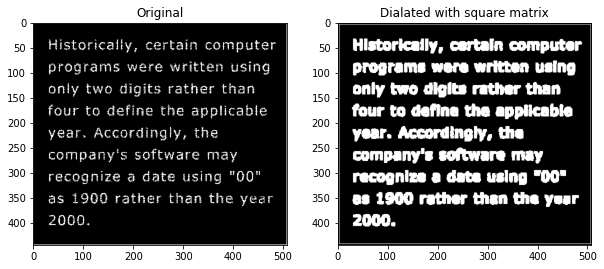

In [142]:
temptemp= []
for i in range(const1, m1-const1):
  for j in range(const1, n1-const1):
    temp1= img1[(i-const1):(i+const1+1), (j-const1):(j+const1+1)]
    # print(temp1)

    product1= temp1*SE1
    dialated_img[i,j]= np.max(product1)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(dialated_img, cmap="gray")
plt.title("Dialated with square matrix")

#### Dialated with + matrix

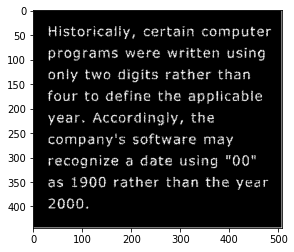

In [147]:
img2= cv.imread('/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif', 0)
p1,q1= img2.shape
plt.imshow(img2, cmap = 'gray', vmin= 0,vmax=256)

In [148]:
#Defining a structuring element for dilation
SE1= np.array([[0,1,0], [1,1,1], [0,1,0]])
const1= 1

#Define new image for dilation 
dialated_img= np.zeros((p1,q1))

Text(0.5, 1.0, 'Dialated with + matrix')

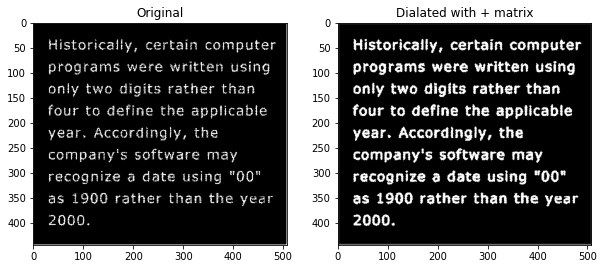

In [151]:
for i in range(const1, p1-const1):
  for j in range(const1, q1-const1):
    temp1= img2[i-const1:i+const1+1, j-const1:j+const1+1]
    product1= temp1*SE1
    dialated_img[i,j]= np.max(product1)


fig=plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img2, cmap="gray", vmin= 0,vmax=256)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(dialated_img,cmap= "gray", vmin= 0,vmax=256)
plt.title("Dialated with + matrix")

### Conclusion:
I implemented image erosion and dialation without using an inbuilt function. I found how changing the the square structuring elemnt's size affects the erroded and dialated image. For the dialated image, I also used another shaped matrix(+) and found that it gave better results than a square matrix for text. This helps understand how a change in the structuring element affects the clarity/blurryness of text.
